In [1]:
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트, 마이너스 
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

### CNN 합성곱 신경망

In [2]:
from tensorflow import keras
from tensorflow.keras.datasets.fashion_mnist import load_data
from sklearn.model_selection import train_test_split

In [3]:
(train_input,train_target),(test_input,test_target) = load_data()

In [4]:
train_scaled = train_input.reshape(-1,28,28,1) /255.0
train_scaled.shape

(60000, 28, 28, 1)

In [5]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled,train_target,test_size=0.2, random_state=42)

In [6]:
print(train_scaled.shape,train_target.shape)
print(val_scaled.shape,val_target.shape)

(48000, 28, 28, 1) (48000,)
(12000, 28, 28, 1) (12000,)


#### 합성곱 신경망 만들기

In [7]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [8]:
model.add(keras.layers.Flatten()) # 7X7X64 + 64
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4)) # 60개의 노드만 통과
model.add(keras.layers.Dense(10,activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [12]:
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


#### 모델 컴파일 훈련

In [14]:
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy',optimizer='adam')

checkpoint_cb = keras.callbacks.ModelCheckpoint('./data/best_CNN_model.h5',save_best_only=True,verbose=1)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True,verbose=1)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1499/1500 [============================>.] - ETA: 0s - loss: 0.5274 - accuracy: 0.8113
Epoch 1: val_loss improved from inf to 0.33460, saving model to ./data\best_CNN_model.h5
1500/1500 [==============================] - 29s 19ms/step - loss: 0.5273 - accuracy: 0.8113 - val_loss: 0.3346 - val_accuracy: 0.8739
Epoch 2/20
1498/1500 [============================>.] - ETA: 0s - loss: 0.3431 - accuracy: 0.8762
Epoch 2: val_loss improved from 0.33460 to 0.28476, saving model to ./data\best_CNN_model.h5
1500/1500 [==============================] - 31s 21ms/step - loss: 0.3430 - accuracy: 0.8763 - val_loss: 0.2848 - val_accuracy: 0.8937
Epoch 3/20
1499/1500 [============================>.] - ETA: 0s - loss: 0.2908 - accuracy: 0.8951
Epoch 3: val_loss improved from 0.28476 to 0.24231, saving model to ./data\best_CNN_model.h5
1500/1500 [==============================] - 31s 21ms/step - loss: 0.2908 - accuracy: 0.8951 - val_loss: 0.2423 - val_accuracy: 0.9093
Epoch 4/20
1499/1500 [====

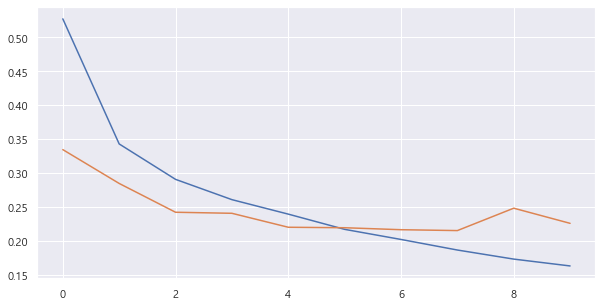

In [15]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [16]:
early_stopping_cb.stopped_epoch

9

In [17]:
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 2s 5ms/step - loss: 0.2153 - accuracy: 0.9211


[0.21529358625411987, 0.9210833311080933]

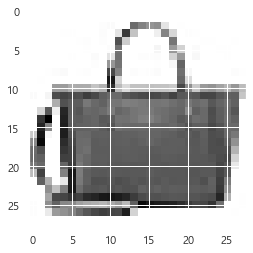

In [25]:
plt.imshow(val_scaled[0].reshape(28,28),cmap='gray_r')
plt.show()

In [21]:
result = model.predict(val_scaled[0:1])
result

1/1 [==============================] - 0s 75ms/step


array([[2.8585647e-15, 1.6700130e-25, 9.2884969e-19, 1.4096053e-18,
        8.9984626e-19, 2.1059299e-18, 1.2923689e-16, 8.1027188e-18,
        1.0000000e+00, 6.2124485e-19]], dtype=float32)

In [28]:
val_labels = np.argmax(model.predict(val_scaled[0:1]),axis=-1)
val_labels

1/1 [==============================] - 0s 23ms/step


array([8], dtype=int64)

In [31]:
classes = ['티셔츠','바지','스웨터','드레스','코트','샌달','셔츠','스니커즈','가방','앵클부츠']

In [32]:
print(classes[np.argmax(result)])

가방
